# 📉 Customer Churn Analysis & Prediction (Classification & EDA Project)

### In the telecom industry, customer retention is crucial. This project explores customer churn behavior and builds a predictive model to help companies retain users by identifying high-risk customers.

## 🎯 Objective:
#### To perform exploratory data analysis and develop a machine learning classification model that predicts whether a customer is likely to churn based on their usage and service patterns.

## ✨ Key Activities:
#### - Explored and visualized customer demographic, service, and billing data.
#### - Cleaned and preprocessed the dataset including missing value handling and encoding.
#### - Compared different models using hyperparameter tuning.
#### - Built a classification model using logistic regression and evaluated its performance.
#### - Uncovered behavioral patterns of churned customers to inform business strategies.


## 📄 Feature Description: Telco Customer Churn Dataset

| Feature            | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| `customerID`        | Unique customer identifier.                                                 |
| `gender`            | Gender of the customer: Male or Female.                                    |
| `SeniorCitizen`     | Indicates if the customer is a senior citizen: 1 (Yes), 0 (No).             |
| `Partner`           | Whether the customer has a spouse or partner: Yes or No.                   |
| `Dependents`        | Whether the customer has dependents (like children): Yes or No.            |
| `tenure`            | Number of months the customer has stayed with the company.                 |
| `PhoneService`      | Whether the customer has a telephone service: Yes or No.                   |
| `MultipleLines`     | Whether the customer has multiple phone lines: Yes, No, or No phone service. |
| `InternetService`   | Type of internet service: DSL, Fiber optic, or No.                         |
| `OnlineSecurity`    | Whether the customer has online security service: Yes, No, or No internet.|
| `OnlineBackup`      | Whether the customer has online backup: Yes, No, or No internet.          |
| `DeviceProtection`  | Whether the customer has device protection: Yes, No, or No internet.      |
| `TechSupport`       | Whether the customer has technical support: Yes, No, or No internet.      |
| `StreamingTV`       | Whether the customer uses streaming TV service: Yes, No, or No internet.  |
| `StreamingMovies`   | Whether the customer uses streaming movies service: Yes, No, or No internet.|
| `Contract`          | Type of contract: Month-to-month, One year, or Two year.                  |
| `PaperlessBilling`  | Whether the customer uses paperless billing: Yes or No.                   |
| `PaymentMethod`     | Payment method used by the customer: e.g., Credit card, Bank transfer.    |
| `MonthlyCharges`    | Monthly amount charged to the customer.                                   |
| `TotalCharges`      | Total amount charged to the customer.                                     |
| `Churn`             | **Target**: Whether the customer has left the service: Yes or No.         |


In [1]:
import pandas as pd # Loading essential libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None) # all columns will be displayed


df = pd.read_csv("https://raw.githubusercontent.com/mindsdb/mindsdb-examples/master/classics/customer_churn/raw_data/WA_Fn-UseC_-Telco-Customer-Churn.csv") # loading dataset
df.head() # displaying initial rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info() # info-check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.describe() # statistical summary

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.isnull().sum() # null value-check

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()] # This will capture object values of 'TotalCharges'
# pd.to_numeric(..., errors='coerce') will convert non numeric values into NaN

print(non_numeric)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') # changing the data type of 'TotalCharges' to numeric


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753    

In [6]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median()) # filling the NaN values with median
df.drop('customerID',axis=1,inplace=True)


In [7]:
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] == 1, 'Yes','No') # converting 'SeniorCitizen' into categorical feature
df.head() # re-check

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# capturing categorical features
cat_feats = [feature for feature in df.columns if df[feature].dtype == 'O']

print("Categorical features are:",cat_feats)

Categorical features are: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [9]:
for feature in cat_feats:
    print("The feature '{}' has {} number of unique values which are {}\n".format(feature, df[feature].nunique(), df[feature].unique()))

The feature 'gender' has 2 number of unique values which are ['Female' 'Male']

The feature 'SeniorCitizen' has 2 number of unique values which are ['No' 'Yes']

The feature 'Partner' has 2 number of unique values which are ['Yes' 'No']

The feature 'Dependents' has 2 number of unique values which are ['No' 'Yes']

The feature 'PhoneService' has 2 number of unique values which are ['No' 'Yes']

The feature 'MultipleLines' has 3 number of unique values which are ['No phone service' 'No' 'Yes']

The feature 'InternetService' has 3 number of unique values which are ['DSL' 'Fiber optic' 'No']

The feature 'OnlineSecurity' has 3 number of unique values which are ['No' 'Yes' 'No internet service']

The feature 'OnlineBackup' has 3 number of unique values which are ['Yes' 'No' 'No internet service']

The feature 'DeviceProtection' has 3 number of unique values which are ['No' 'Yes' 'No internet service']

The feature 'TechSupport' has 3 number of unique values which are ['No' 'Yes' 'No intern

In [10]:
num_feats = [feature for feature in df.columns if df[feature].dtypes != 'O'] # capturing numerical features
print("Numerical features are:", num_feats)

Numerical features are: ['tenure', 'MonthlyCharges', 'TotalCharges']


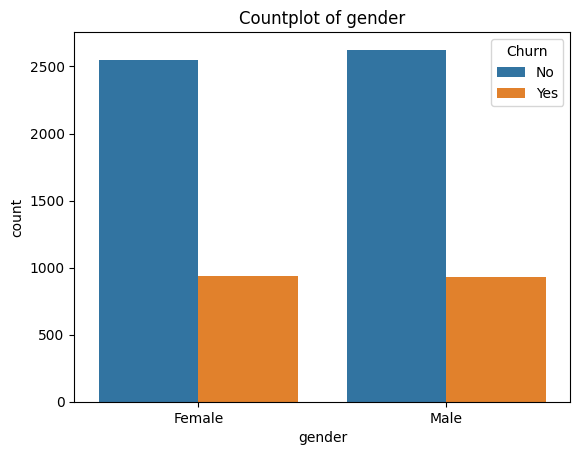

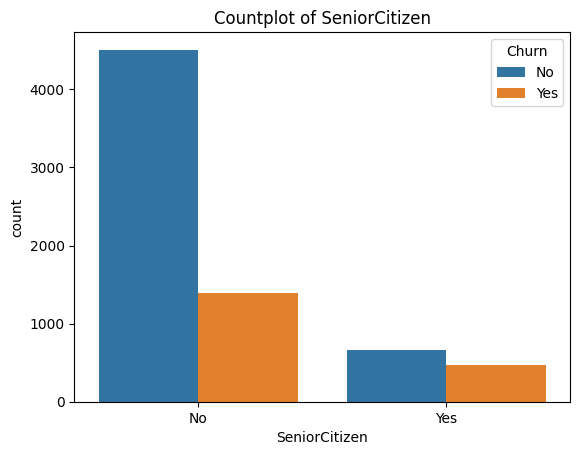

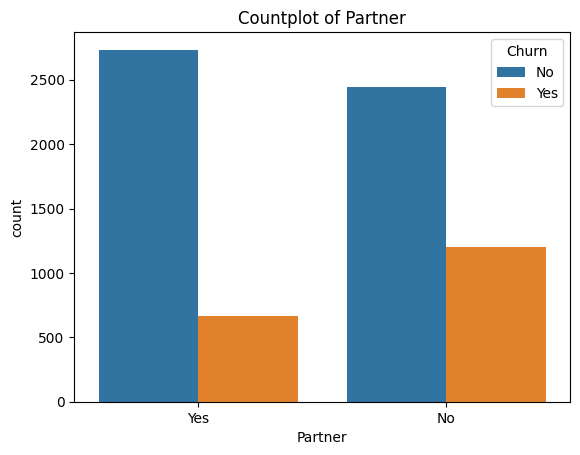

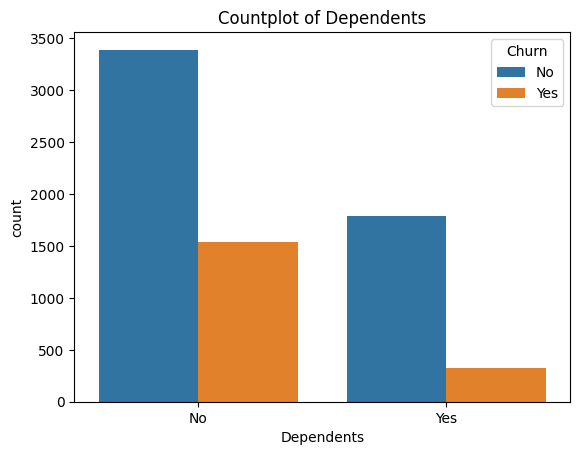

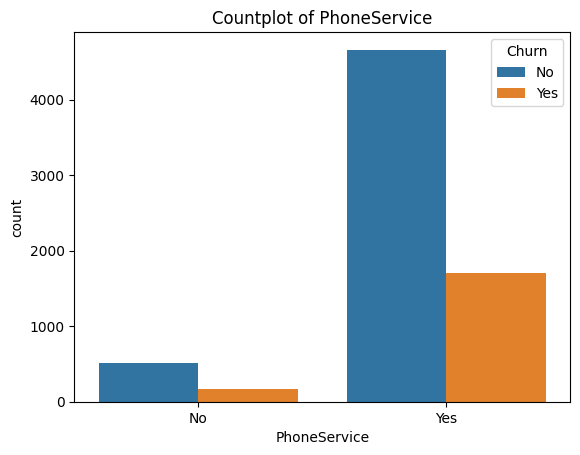

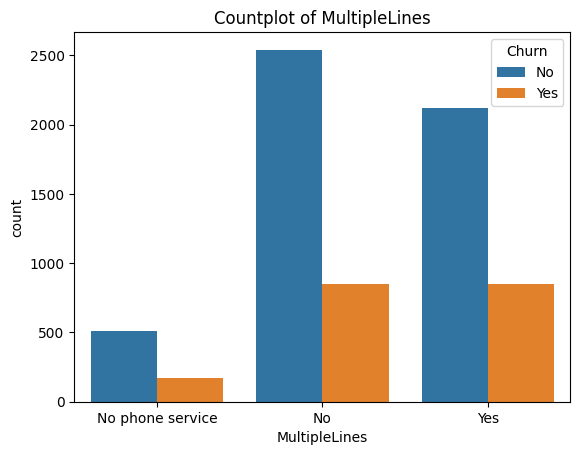

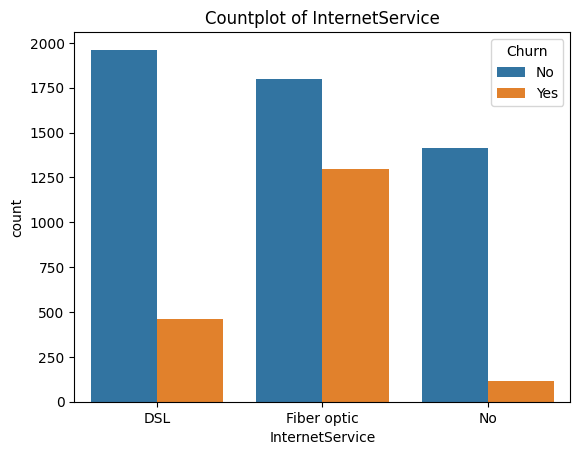

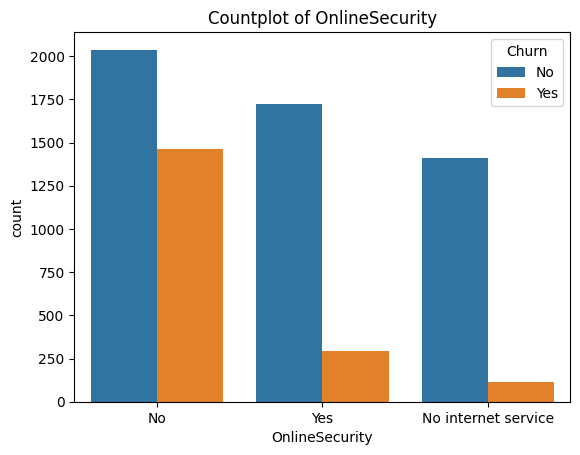

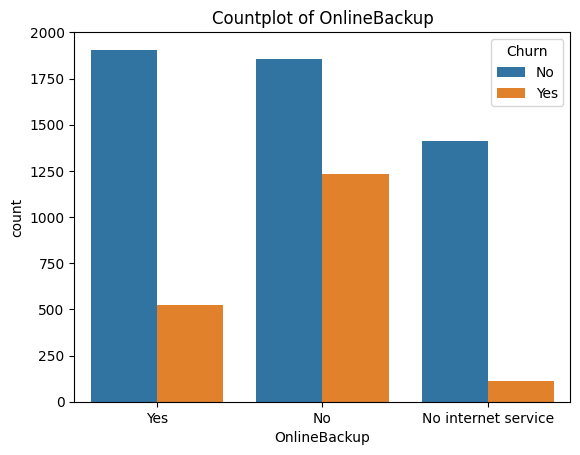

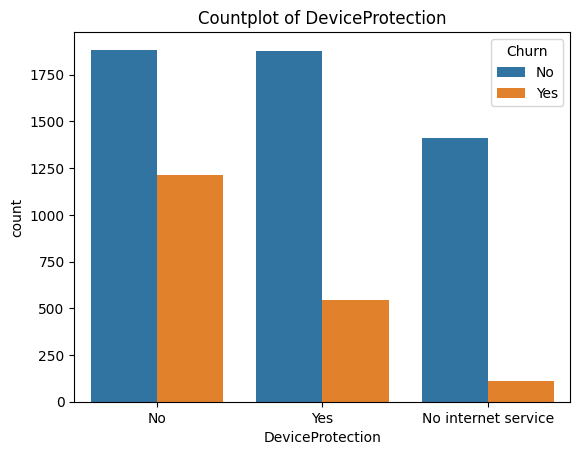

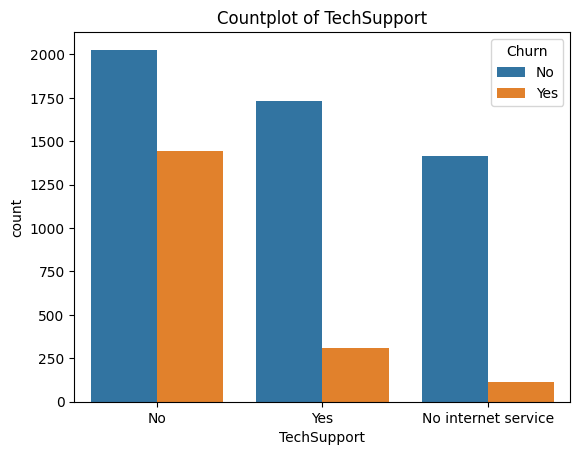

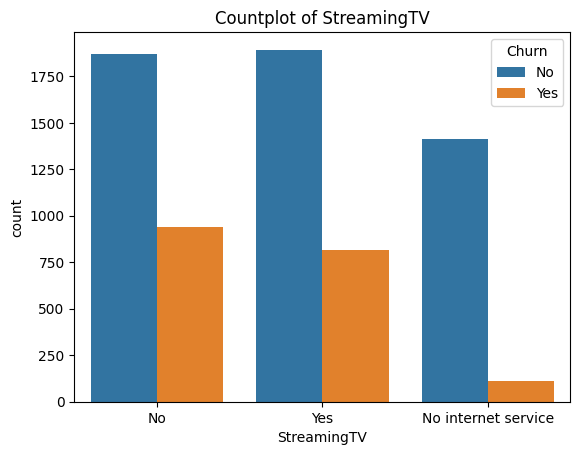

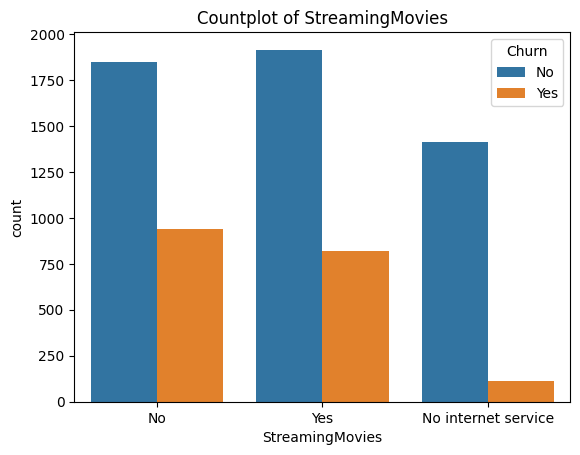

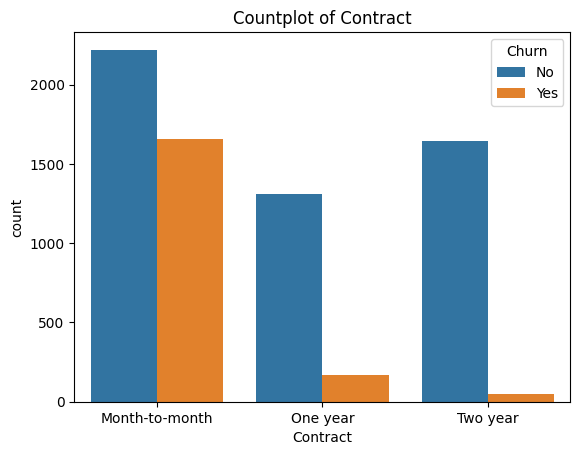

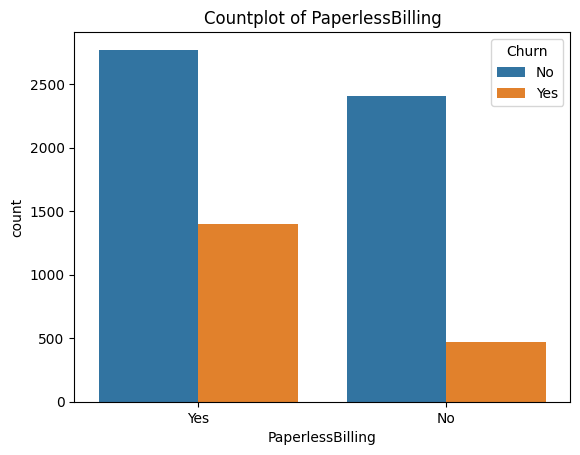

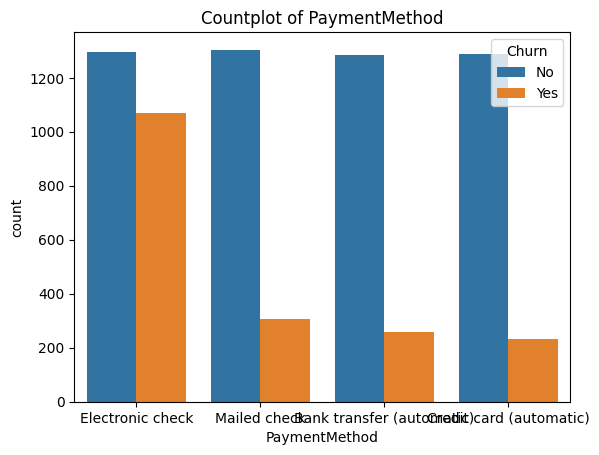

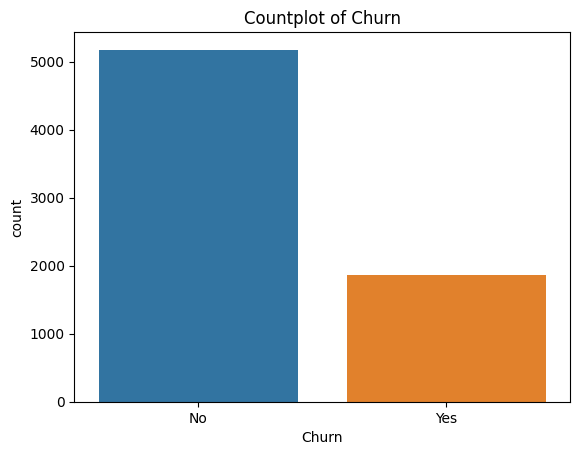

In [11]:
for feature in cat_feats:
    sns.countplot(x =df[feature], hue = 'Churn', data=df) # 
    plt.title("Countplot of {}".format(feature))
    plt.show()
    

### Key observation:
- ### From the above countplot of 'PhoneService', it can be observed that the majority of customers Who have phone service, are less likely to churn, which suggests that phone service is providing satisfactory services to the customers, that is why majority of customers don't want to quit the services.

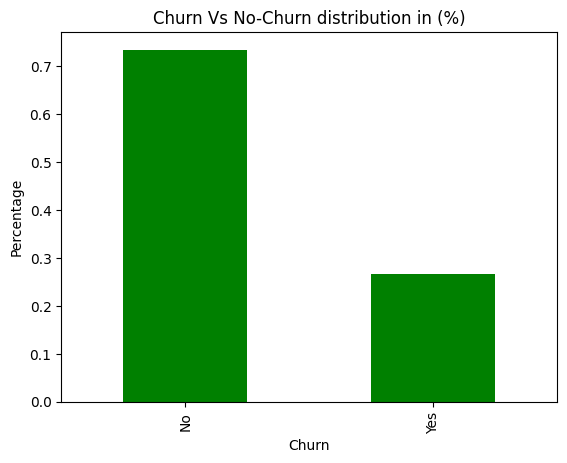

In [12]:
df['Churn'].value_counts(normalize=True).plot.bar(color='green') # churn vs no-churn distribution
plt.title("Churn Vs No-Churn distribution in (%)")
plt.ylabel("Percentage")
plt.show()

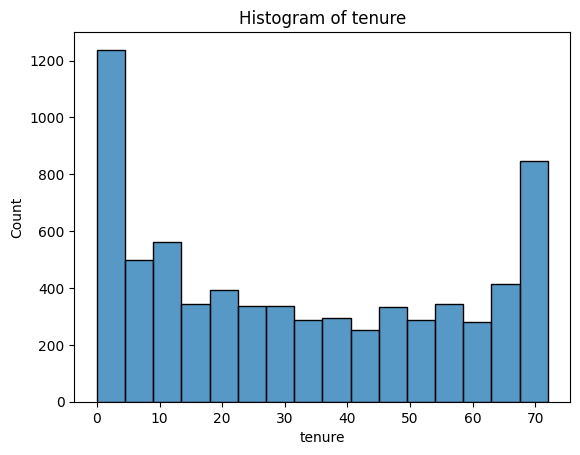

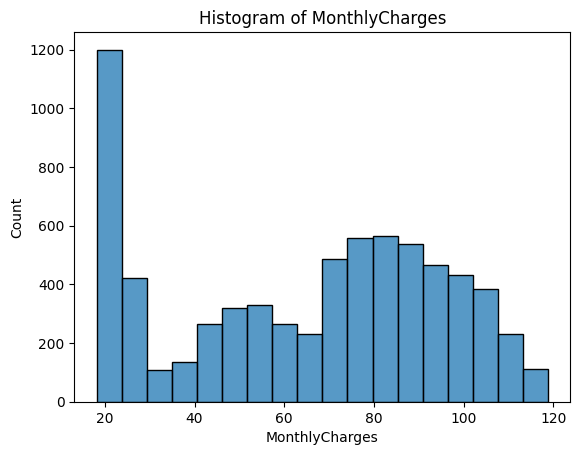

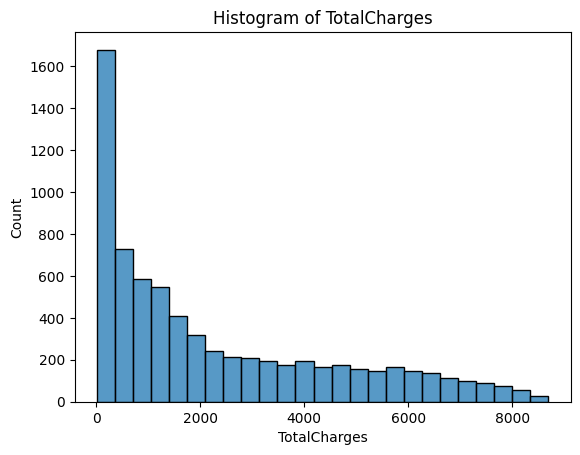

In [13]:
for feature in num_feats:
    sns.histplot(df[feature]) # Histogram of numerical features
    plt.title("Histogram of {}".format(feature))
    plt.show()

## Key observations from the above histograms:

- ### As it can be observed in the histogram of 'tenure', 1,700 customers have been using the service for up to one year.
- ### Histogram of 'TotalCharges' is following log normal distribution, which is indicating that over time, the count of customers who paid high total charges got reduced.

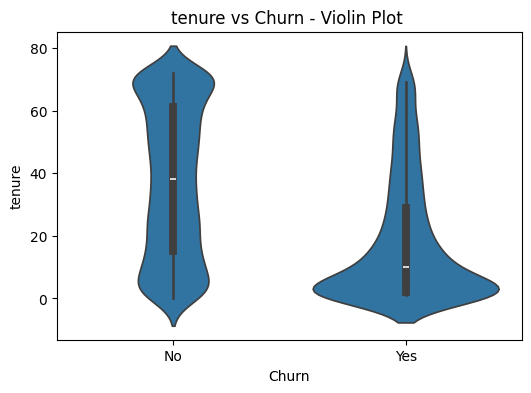

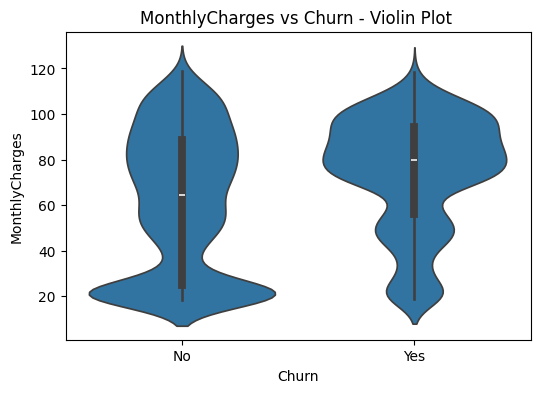

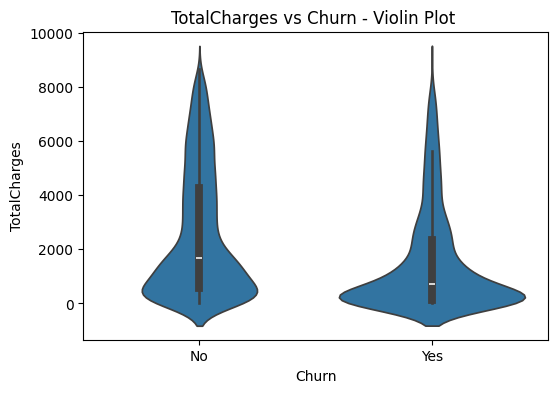

In [14]:
for col in num_feats:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Churn', y=col, data=df) # Violin plot of numerical features
    plt.title(f'{col} vs Churn - Violin Plot ')
    plt.show()


## Observations from the above violin plots:

- ### Most of the customers who are going to churn have mostly used services for up to 2 years which means that they have used the services for less amount of time. This insight can be seen in the violin plot and the histogram plot of 'tenure'.

- ### It can be seen in the violin plot of 'TotalCharges' that most of the customers who are about to churn have paid less than $2000 of total charges.

- ### From the violin plot of 'MonthlyCharges' it can be observed that most of the customers who are about to churn were paying monthly charges higher than $60 ($80 on average) as compared to the average monthly charges of non-churn customers, which may suggest that customers are not satisfied with the services that are offered in this higher price range. The company should provide extra beneficiaries to the customers within the price range of $60 to $120.

## In summary, the company should provide cost-effective services to the customers when monthly charges are higher because, customers who are about to churn have paid higher monthly charges. Majority of customers who are about to churn have used services for up to 18 months.

In [15]:
for feature in num_feats: # Flagging the outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR  # lower bound
    upper_limit = Q3 + 1.5 * IQR # upper bound

    df["{}_outliers".format(feature)] = (df[feature] < lower_limit)| (df[feature] > upper_limit) # creating new column for flagging
    
    print("Value counts of '{}_outliers' column: {}".format(feature, df["{}_outliers".format(feature)].value_counts()))
    outliers_values = df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature].tolist()
    print(f"Outlier values in '{feature}': {outliers_values}\n")

Value counts of 'tenure_outliers' column: tenure_outliers
False    7043
Name: count, dtype: int64
Outlier values in 'tenure': []

Value counts of 'MonthlyCharges_outliers' column: MonthlyCharges_outliers
False    7043
Name: count, dtype: int64
Outlier values in 'MonthlyCharges': []

Value counts of 'TotalCharges_outliers' column: TotalCharges_outliers
False    7043
Name: count, dtype: int64
Outlier values in 'TotalCharges': []



In [16]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0) # label encoding on output feature


## Train-Test-Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'tenure_outliers',
       'MonthlyCharges_outliers', 'TotalCharges_outliers']], df['Churn'], random_state=42, train_size=0.8)

## Log transformation

In [18]:
skewed_features = [feature for feature in num_feats if df[feature].nunique() > 25] # capturing skewed features
print("Features that are skewed are:", skewed_features)

X_train_log = X_train.copy()
X_test_log = X_test.copy()

for feature in skewed_features:
    X_train_log[feature] = np.log1p(X_train_log[feature])
    X_test_log[feature] = np.log1p(X_test_log[feature])

len(X_train_log.columns)

Features that are skewed are: ['tenure', 'MonthlyCharges', 'TotalCharges']


22

## Categorical Encoding

In [19]:
from sklearn.compose import ColumnTransformer # for column transformation
from sklearn.preprocessing import OneHotEncoder # for categorical encoding
X_train_cat = [feature for feature in X_train.columns if X_train[feature].dtypes == "O"] # capturing categorical features of X_train


ct = ColumnTransformer(transformers=[('cat_enc', OneHotEncoder(drop='first',handle_unknown='ignore'),  X_train_cat)], remainder='passthrough')

X_train_encoded = ct.fit_transform(X_train_log)
X_test_encoded = ct.transform(X_test_log)
X_train_encoded


array([[0.0, 0.0, 0.0, ..., False, False, False],
       [0.0, 0.0, 0.0, ..., False, False, False],
       [1.0, 0.0, 1.0, ..., False, False, False],
       ...,
       [1.0, 0.0, 1.0, ..., False, False, False],
       [1.0, 1.0, 0.0, ..., False, False, False],
       [1.0, 0.0, 0.0, ..., False, False, False]],
      shape=(5634, 33), dtype=object)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler # This is for scaling the data between negative infinity and positive infinity

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded) # fitting and transforming the X_tran
X_test_scaled = scaler.transform(X_test_encoded) # transforming the X_test

## Feature Selection

In [21]:
# Applying Grid Search + Cross Validation for feature selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE # RFE - Recursive Feature Elimination best and more robust for feature selection in logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=1000, class_weight='balanced')

for k in range(5, 35, 5):  # k in range of 5 to 34 in steps of 5
    rfe = RFE(estimator=lr, n_features_to_select=k)
    # RFE will select k number of features and then it will give top k number of features based on lr
    # RFE is more reliable when class_weights = 'balanced' is assigned to the model when target variable is imbalanced

    pipe = Pipeline([

        ('feature_select', rfe),
        ('classifier', lr)
    ])
    # RFE will select k number of features and then it will give top k number of features based on lr in rfe pipeline
    # On those k number of features, lr model will be trained in lr pipeline

    scores = cross_val_score(pipe, X_train_scaled, y_train, cv=5, scoring='recall')
    print(f"{k} features → Recall: {scores.mean():.4f}") # calculating the mean of combined scores of every cv for each k value


5 features → Recall: 0.8035
10 features → Recall: 0.8021
15 features → Recall: 0.8108
20 features → Recall: 0.8102
25 features → Recall: 0.8088
30 features → Recall: 0.8088


### Recall is higher in both 15 and 20 features, but I am selecting top 20 features to avoid any information loss.

In [22]:
# Final Pipeline with the best 20 features

rfe2= RFE(estimator=lr, n_features_to_select=20)

final_pipe = Pipeline([
    ('feature_select', rfe2), 
    ('classifier', lr)
])

final_pipe.fit(X_train_scaled, y_train)

y_pred = final_pipe.predict(X_test_scaled) # predicting X_test_scaled

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409



## Observations:

### Class 0 (No churn):

   - ### Precision: Out of the total class 0 predicted values, 92% of the values were correct.
   - ### Recall: Out of the total actual class 0 values, 72% of the values were predicted correctly.

### Class 1 (churn):

   - ### Precision: Out of the total class 1 predicted values, only 52% of the values were correct.
   - ### Recall: Out of the total actual class 1 values, 83% of the values were predicted correctly.

### Accuracy is good and also recall is impressive for churn (1), and for No-churn (0).

### Recall of class 1 is more prioritized by me to because high recall is more needed in this type of dataset to full fill a business goal.
 

## Hyperparameter tuning on Logistic Regression model

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

# Hyperparameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # the alpha values of regularization
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']  # Required fo 11 or l2
}

# GridSearchCV with recall scoring
grid = GridSearchCV(final_pipe, param_grid, cv=5, scoring='recall')
grid.fit(X_train_scaled, y_train ) 

# Best model and predictions
print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)  # final model prediction

# Evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Test Accuracy: 0.7487579843860894
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.84      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409



### The classification report is almost similar to the above classification report which is calculated using final_pipe. The observations are also similar.

## Applying threshold tuning to get the probability values of class 1 to see the relationship between Precision, Recall and the threshold values on graph. I have used Precision-Recall curve to compare threshold instead of AUC-ROC curve because, it gives best results when data is very imbalanced. AUC-ROC curve also gives impressive results when data is imbalanced in the ratio of 70:30, but Precision-Recall is more reliable.


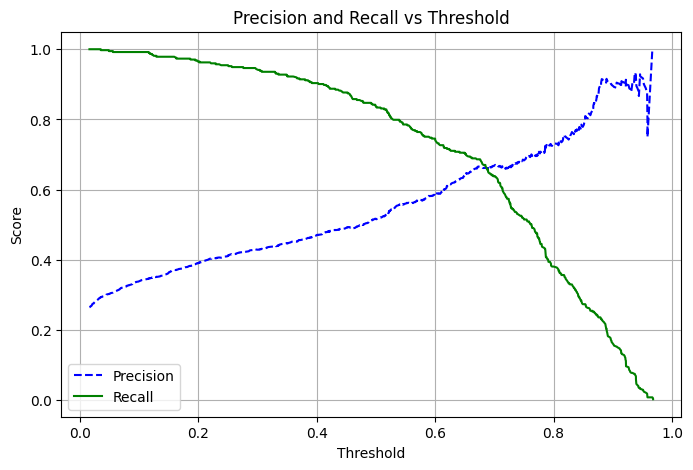

In [24]:
from sklearn.metrics import precision_recall_curve, f1_score

y_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (churn)

# Calculating precision, recall and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# ploting Precision-Recall vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision") # Since the length of precision and recall is n+1 of threshold that is why taking values till -1
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

In [25]:
# Applying custom threshold
threshold = 0.46 # The more the threshold value is less, the more the recall score increases for class 1
y_pred_custom = (y_proba >= threshold).astype(int)

# Check new metrics

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

Confusion Matrix:
 [[702 334]
 [ 53 320]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.78      1036
           1       0.49      0.86      0.62       373

    accuracy                           0.73      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.81      0.73      0.74      1409



### Using threshold of 0.46 is giving excellent results in terms of high recall score for class 1 and class 0 that is 86% and 70%. This threshold value, and the parameters used in lr are enough to make a churn prediction model.

## Using Decision Tree to compare model. Since Decision Tree selects best split based on purity, therefore, there is no need to apply feature selection.

In [26]:
import optuna # Bayesian Optimization for DecisionTreeClassifier using Optuna. It is the most fastest as well as smartest and most accurate tuning technique
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X_train_scaled, y_train)


# Defining objective function
def objective(trial):
    # Suggesting hyperparameters
    max_depth = trial.suggest_int("max_depth", 2, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])

    # Creating model with trial params
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=42
    )

    # 5-fold cross-validation
    score = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='recall').mean()
    return score

# Creating study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Printing best result
print("Best Params:", study.best_params)
print("Best Accuracy:", study.best_value)



tree = DecisionTreeClassifier(
max_depth = study.best_params['max_depth'], 
criterion=study.best_params['criterion'],
min_samples_split= study.best_params['min_samples_split'],
min_samples_leaf = study.best_params['min_samples_leaf'])

tree.fit(X_resampled, y_resampled)

y_pred = tree.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


[I 2025-07-11 09:20:08,243] A new study created in memory with name: no-name-93552ef7-73da-4818-b9cd-879c4c0a67f7
[I 2025-07-11 09:20:08,600] Trial 0 finished with value: 0.8255019306147007 and parameters: {'max_depth': 7, 'min_samples_split': 17, 'min_samples_leaf': 8, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.8255019306147007.
[I 2025-07-11 09:20:08,982] Trial 1 finished with value: 0.7834627224880103 and parameters: {'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 10, 'criterion': 'gini'}. Best is trial 0 with value: 0.8255019306147007.
[I 2025-07-11 09:20:09,521] Trial 2 finished with value: 0.7672680487648155 and parameters: {'max_depth': 24, 'min_samples_split': 13, 'min_samples_leaf': 2, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.8255019306147007.
[I 2025-07-11 09:20:09,857] Trial 3 finished with value: 0.8233253888976512 and parameters: {'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 9, 'criterion': 'entropy'}. Best is trial

Best Params: {'max_depth': 2, 'min_samples_split': 17, 'min_samples_leaf': 7, 'criterion': 'log_loss'}
Best Accuracy: 0.9047812651513825
              precision    recall  f1-score   support

           0       0.95      0.56      0.71      1036
           1       0.43      0.91      0.58       373

    accuracy                           0.66      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.81      0.66      0.67      1409



## Threshold tuning for Decision Tree

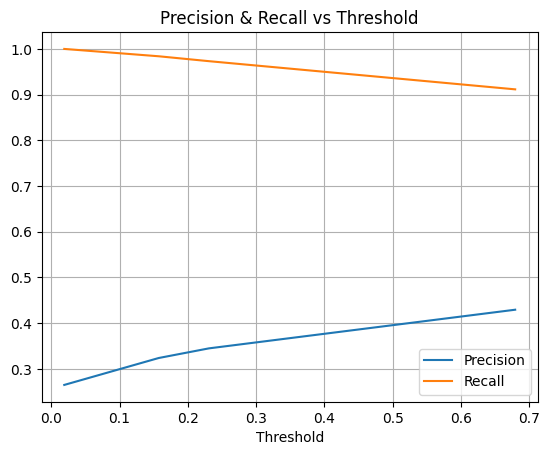

[[584 452]
 [ 33 340]]
              precision    recall  f1-score   support

           0       0.95      0.56      0.71      1036
           1       0.43      0.91      0.58       373

    accuracy                           0.66      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.81      0.66      0.67      1409



In [27]:
y_probs = tree.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plotting precision-recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.title('Precision & Recall vs Threshold')
plt.show()

optimal_threshold = 0.5133 # optimal threshold
y_pred_thresholded = (y_probs >= optimal_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_thresholded))
print(classification_report(y_test, y_pred_thresholded))


### Observation: Using different threshold values are not giving the higher recall values (for both classes) when compared to the recall values of logistic regression.

### Since the Decision Tree model fails to achieve the desired recall thresholds for both classes, Logistic Regression remains the better-performing model in terms of balanced recall performance

## Applying KNN classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

# Resampling using SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train_scaled, y_train)

# Feature Selection (Top 15 based on ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_resampled, y_resampled)
X_test_selected = selector.transform(X_test_scaled)

# Custom scorer to ensure recall_class_1 > 0.86 and recall_class_0 > 0.70
def custom_recall_score(y_true, y_pred):
    recall_0 = recall_score(y_true, y_pred, pos_label=0)
    recall_1 = recall_score(y_true, y_pred, pos_label=1)
    return 1.0 if recall_1 >= 0.86 and recall_0 >= 0.70 else 0.0

custom_scorer = make_scorer(custom_recall_score, greater_is_better=True)

# GridSearchCV with custom scorer
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring=custom_scorer)
grid.fit(X_train_selected, y_resampled)

best_knn = grid.best_estimator_
print("Best Params:", grid.best_params_)


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [30 31 32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best Params: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


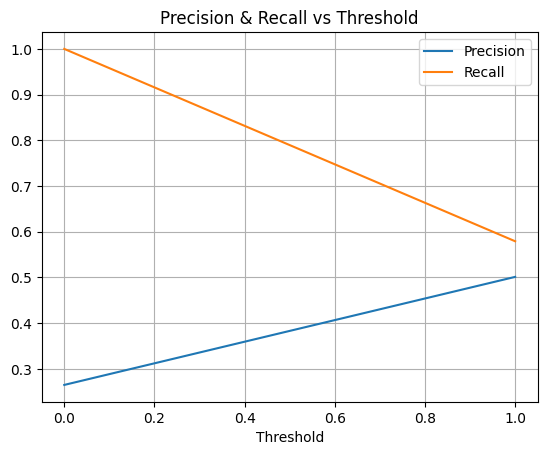

[[821 215]
 [157 216]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1036
           1       0.50      0.58      0.54       373

    accuracy                           0.74      1409
   macro avg       0.67      0.69      0.68      1409
weighted avg       0.75      0.74      0.74      1409



In [29]:
# Evaluation on Test Set
y_probs = best_knn.predict_proba(X_test_selected)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold')
plt.grid()
plt.legend()
plt.show()

# Applying custom threshold (manually selected from curve)
optimal_threshold = 0.2
y_pred_thresholded = (y_probs >= optimal_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_thresholded))
print(classification_report(y_test, y_pred_thresholded))


### KNN is also not performing well, it is performing (giving bad results) when compared to Decision Tree and LR, therfore it is not a best model

## Logistic Regression is best suitable model with it's best hyperparameter for creating a best model for churn prediction.